In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
region = ['Brazil',
 'C. Europe',
 'Canada',
 'China',
 'E. Africa',
 'India',
 'Indonesia',
 'Japan',
 'Kazakhstan region',
 'Korea',
 'Mexico',
 'Middle East',
 'N. Africa',
 'Oceania',
 'Rest C. America',
 'Rest S. Africa',
 'Rest S. America',
 'Rest S. Asia',
 'Russia',
 'SE. Asia',
 'South Africa',
 'Turkey',
 'USA',
 'Ukraine region',
 'W. Africa',
 'W. Europe']

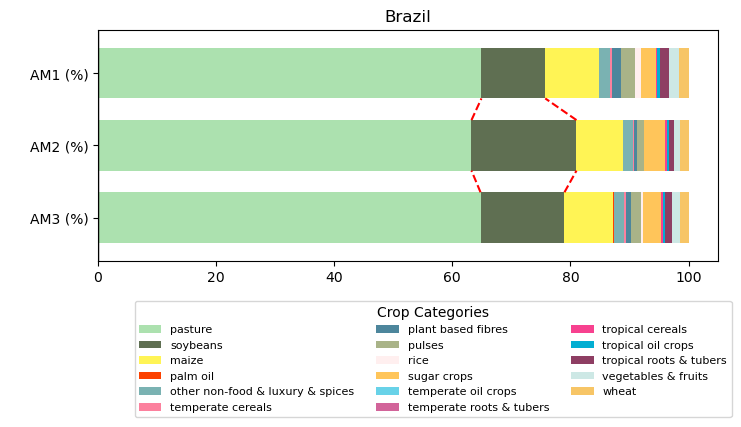

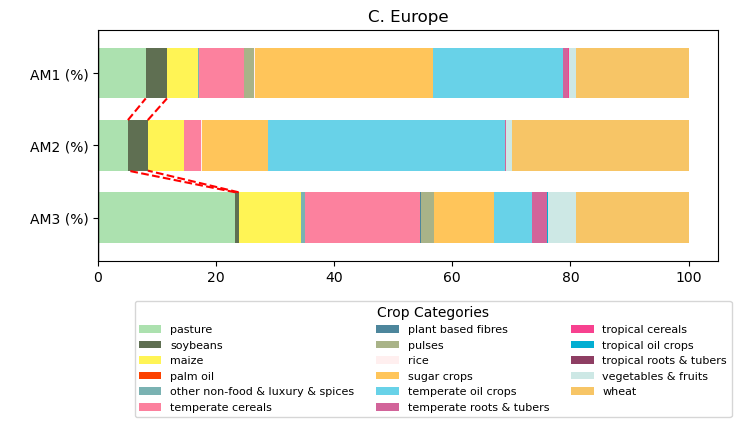

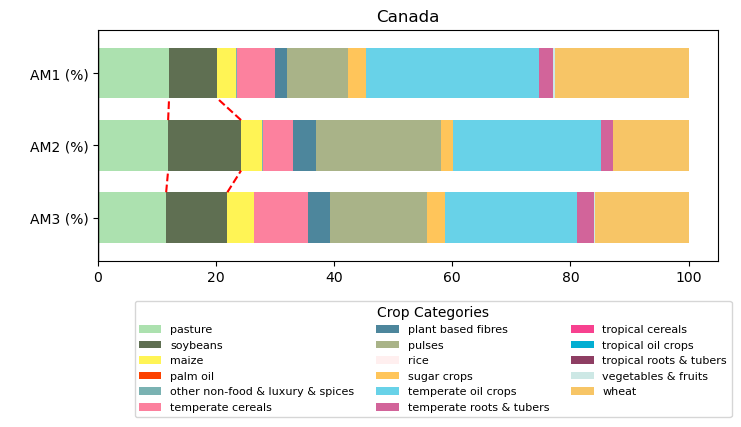

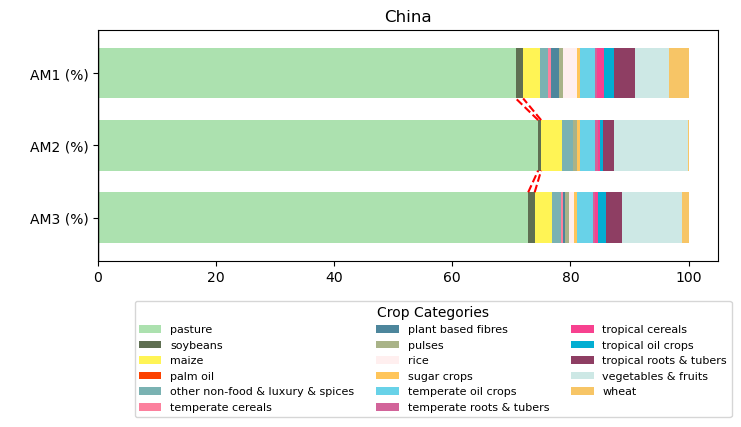

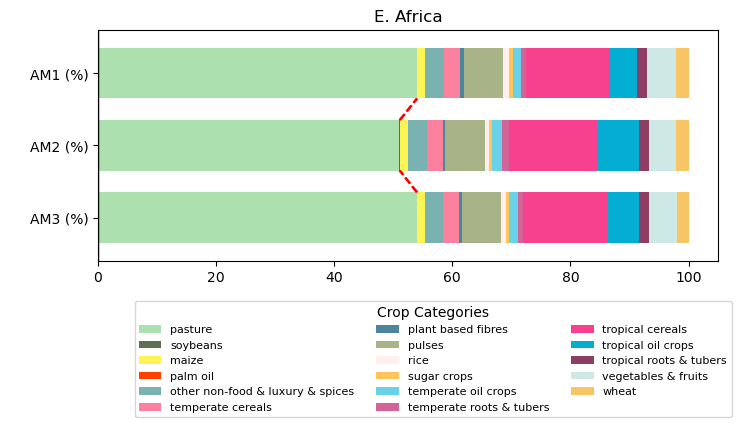

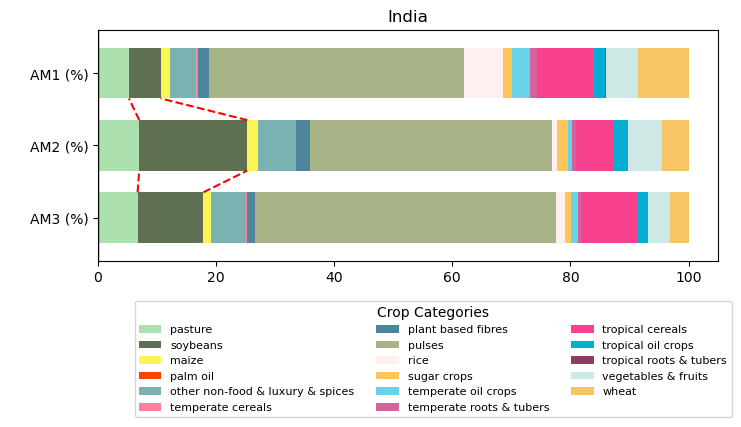

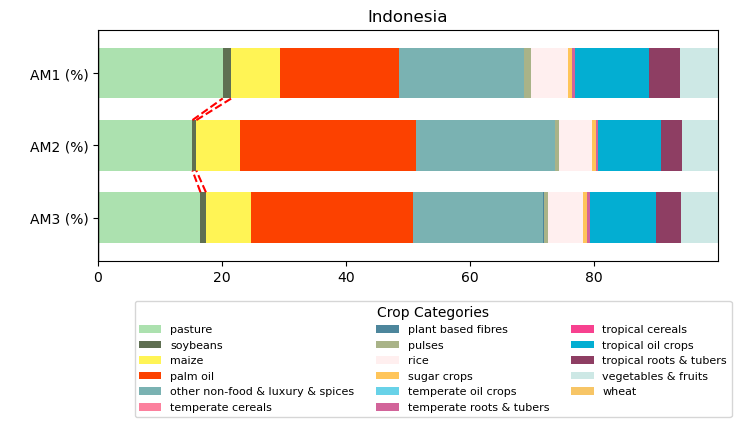

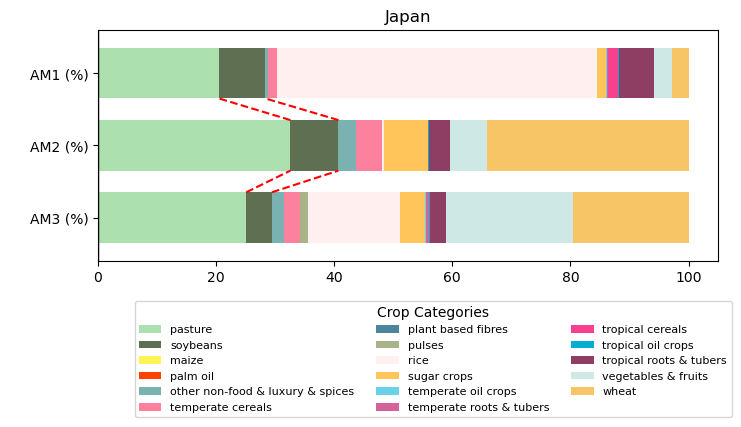

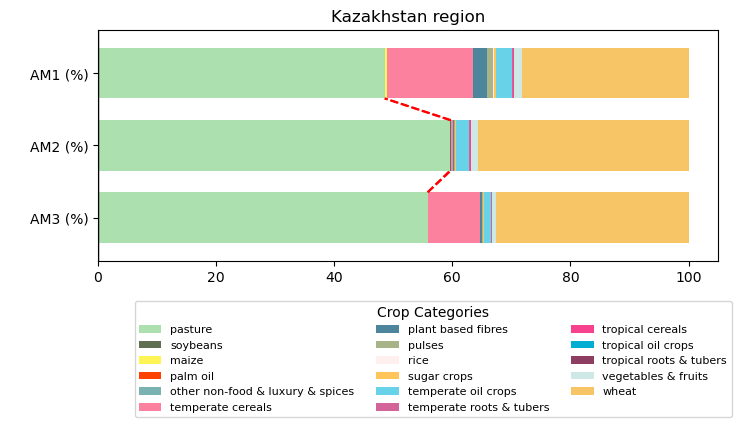

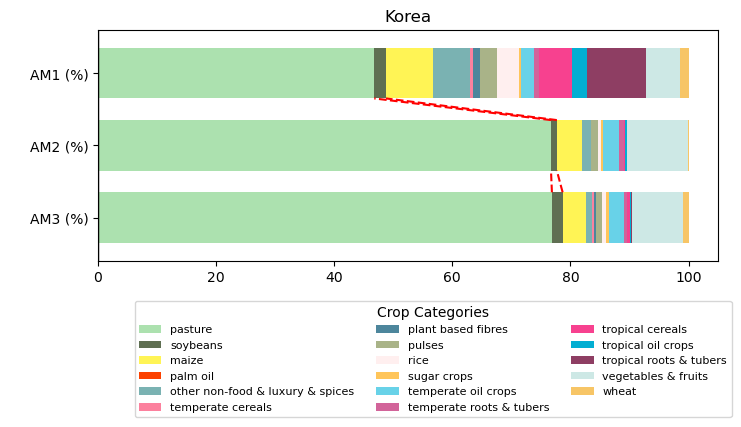

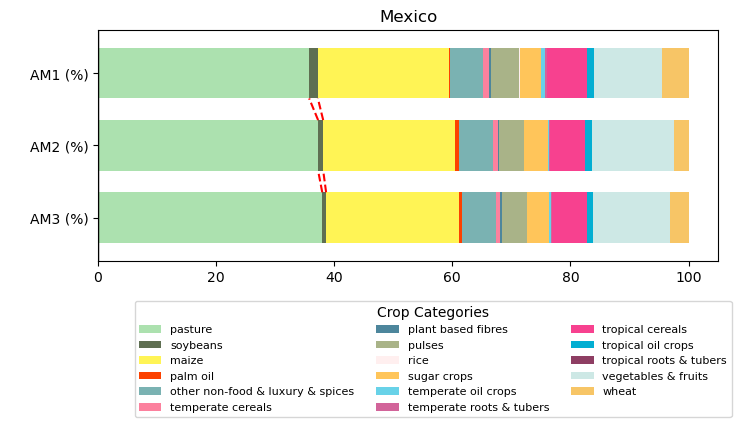

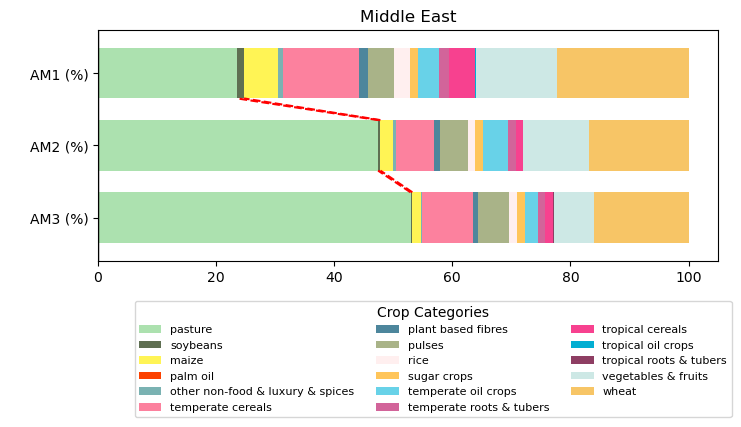

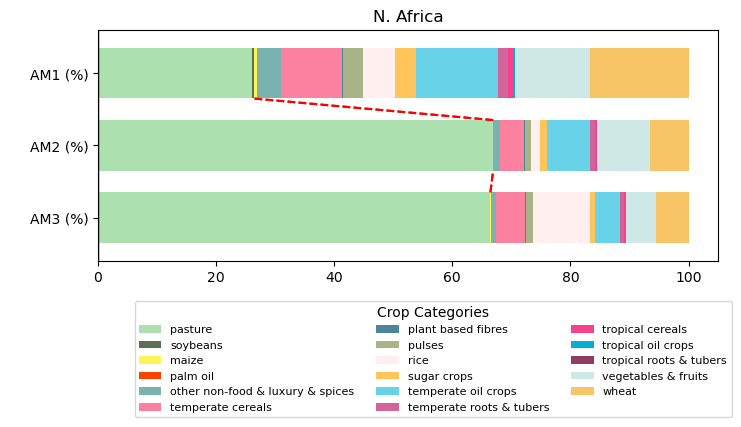

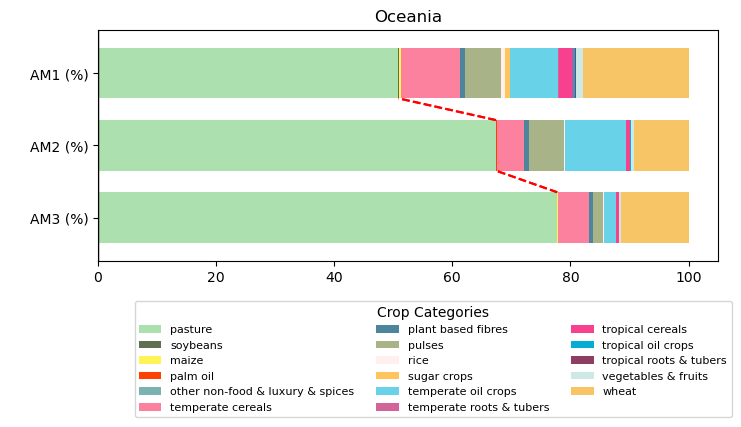

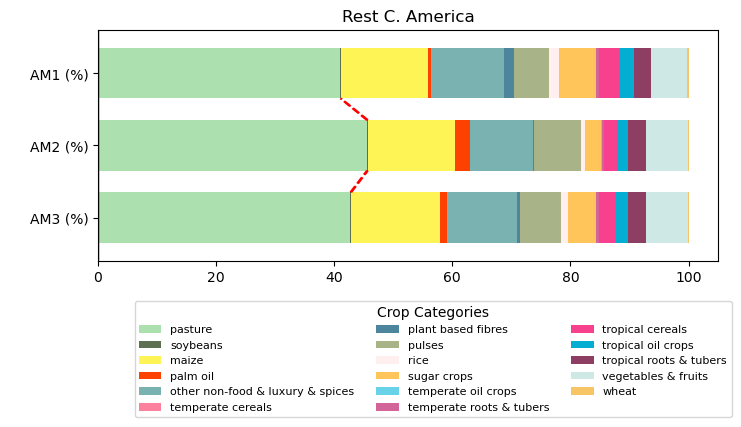

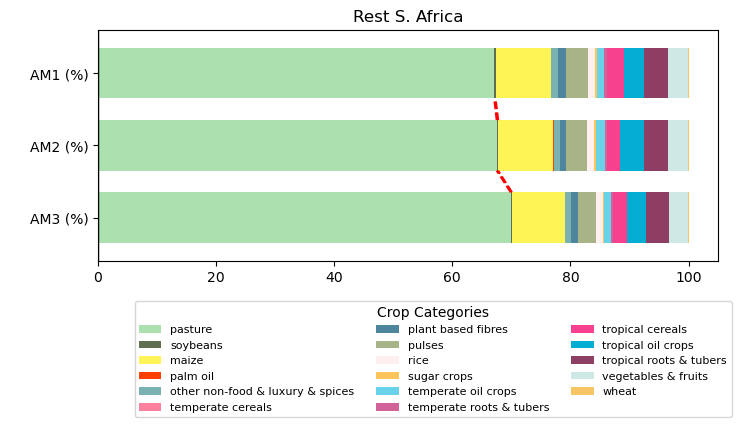

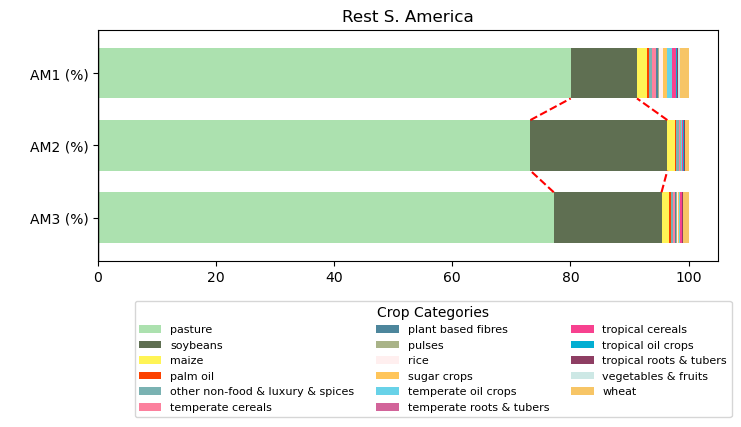

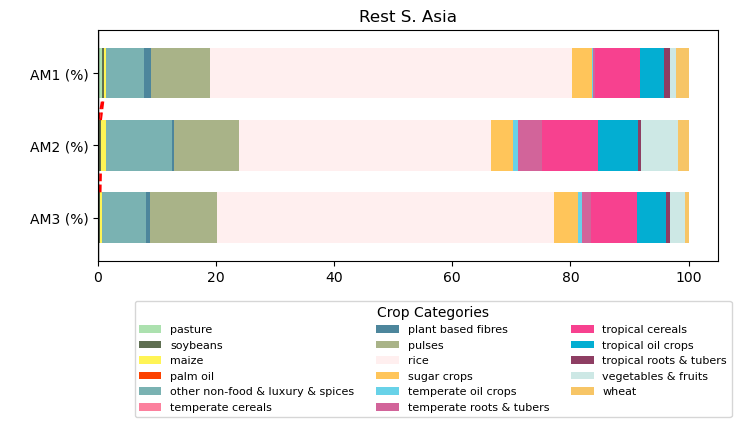

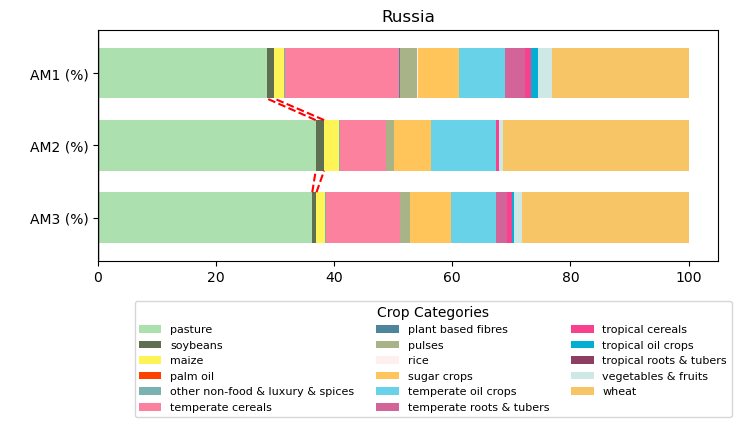

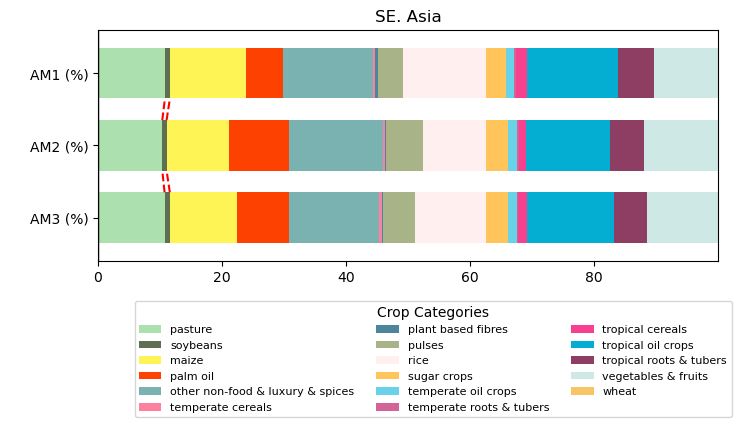

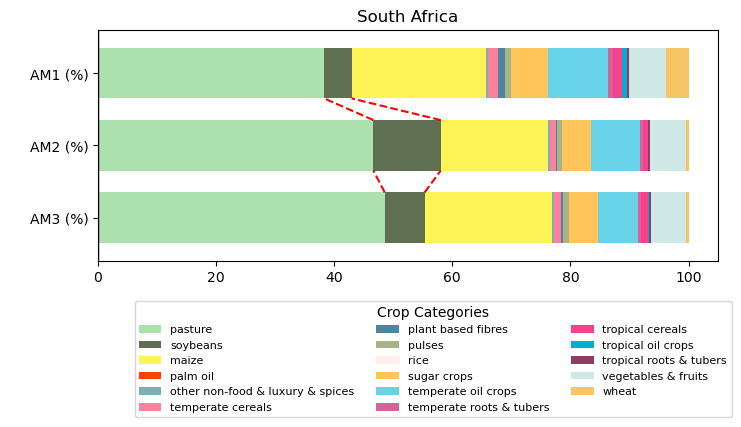

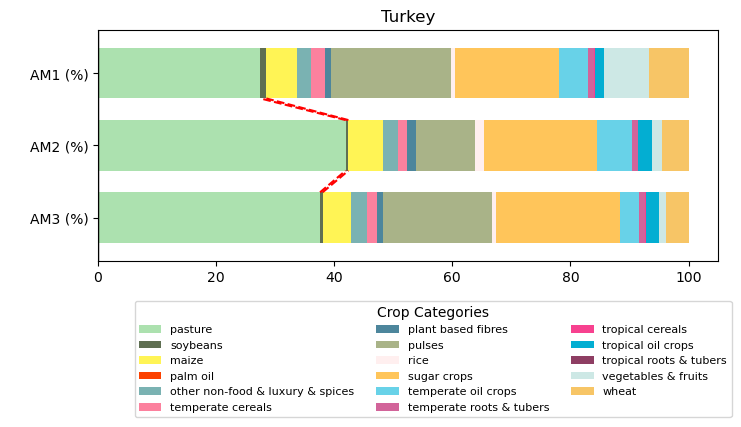

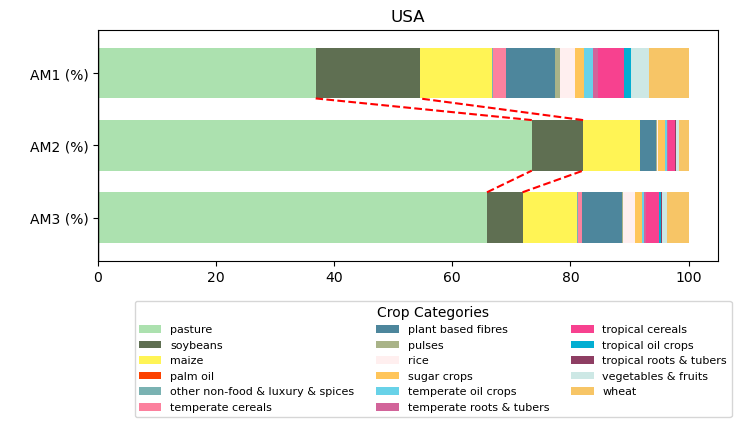

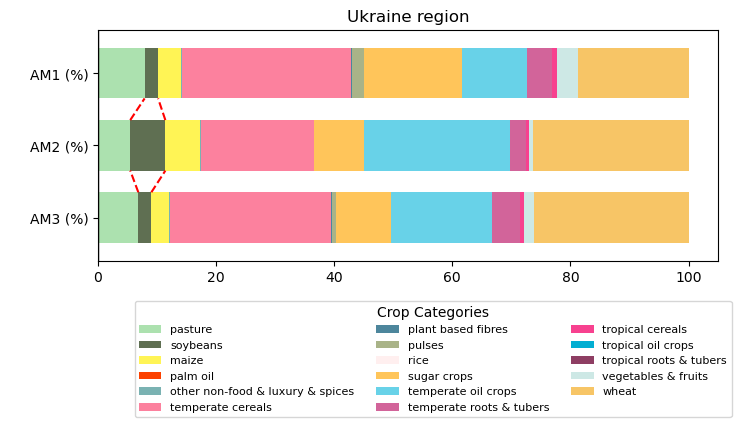

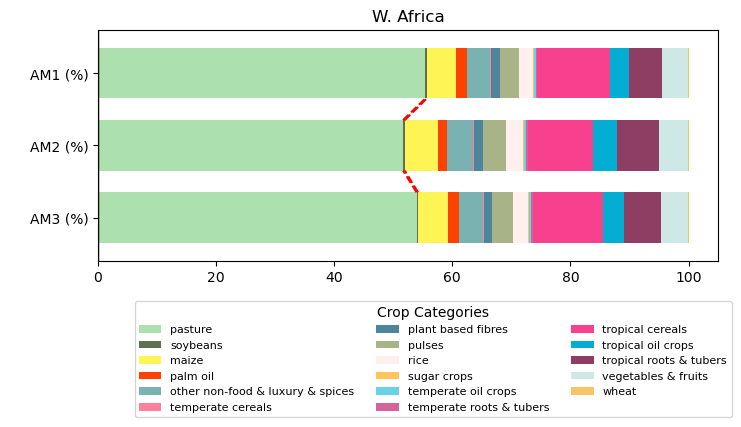

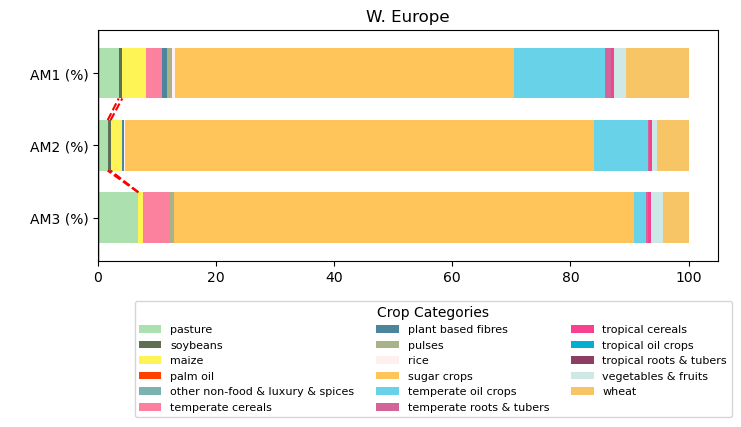

In [3]:
label = ['plant based fibres','other non-food & luxury & spices','vegetables & fruits','palm oil',
            'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
            'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
        'wheat','pasture']

colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
          '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
          '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566', '#ACE1AF']

for sheet_regions in region:
    df = pd.read_excel("X:/cadlan/stream_2/Step5/komparasiAM123_region_v4.xlsx", engine="openpyxl", sheet_name=f'{sheet_regions}')
    df = pd.DataFrame(df)
    df = df.rename(columns={'Crop Category': ' '})
    df = df.rename(columns={'grass': 'pasture'})
    df = df.rename(columns={'oil & palm fruit': 'palm oil'})
    df = df.rename(columns={'non-food & luxury & spices': 'non food, luxury, spices'})
    df = df.rename(columns={'other temperate cereals': 'temperate cereals'})
    df.set_index(' ', inplace=True)

    # reorder the columns
    new_order = ['pasture', 'soybeans'] + [col for col in df.columns if col not in ['pasture', 'soybeans']]
    df = df[new_order]

    df = df.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

    new_colors = [colors[label.index(col)] for col in new_order]

    # plot
    fig, ax = plt.subplots(figsize=(8, 3))  # reduce the height of the figure
    df.plot(kind = 'barh', stacked=True, color=new_colors, ax=ax, width=0.7)

    plt.axvline(x=0, color='k', linewidth=1)
    plt.legend(title='Crop Categories', loc='lower left', bbox_to_anchor = (0.05, -0.70), ncol=3, prop={'size': 8})
    
    # Calculate height dan number of stacks
    height = ax.patches[0].get_height()
    stacks = 2

    # Plot connecting lines
    for i in range(stacks):
        for j in range(len(df.index) - 1):
            w0 = sum(ax.patches[j + len(df.index) * k].get_width() for k in range(i + 1))
            w1 = sum(ax.patches[j + 1 + len(df.index) * k].get_width() for k in range(i + 1))
            
            ax.plot([w0, w1], [j + height / 2, j + 1 - height / 2], color='red', ls='--', zorder=1)

    plt.title(f'{sheet_regions}')  # Add region name to the title

    # plt.tight_layout(pad=10.0)

    plt.show()


In [4]:
brazil = pd.read_excel("X:/cadlan/stream_2/Step5/komparasiAM123_region_v4.xlsx", engine="openpyxl", sheet_name='Brazil')
south_am = pd.read_excel("X:/cadlan/stream_2/Step5/komparasiAM123_region_v4.xlsx", engine="openpyxl", sheet_name='Rest S. America')
indo = pd.read_excel("X:/cadlan/stream_2/Step5/komparasiAM123_region_v4.xlsx", engine="openpyxl", sheet_name='Indonesia')
sea = pd.read_excel("X:/cadlan/stream_2/Step5/komparasiAM123_region_v4.xlsx", engine="openpyxl", sheet_name='SE. Asia')

In [5]:
df_brazil = pd.DataFrame(brazil)
df_south_am = pd.DataFrame(south_am)
df_indo = pd.DataFrame(indo)
df_sea = pd.DataFrame(sea)

In [6]:
df_south_am

,Crop Category,grass,maize,oil & palm fruit,other non-food & luxury & spices,other temperate cereals,plant based fibres,pulses,rice,soybeans,sugar crops,temperate oil crops,temperate roots & tubers,tropical cereals,tropical oil crops,tropical roots & tubers,vegetables & fruits,wheat
0,AM1 (%),80.051996,1.727108,0.274938,0.619013,0.541435,0.370807,0.260181,0.647350,11.224860,0.559645,0.843448,0.060908,0.649190,0.244533,0.221450,0.265435,1.437703
1,AM2 (%),73.218874,1.236418,0.306219,0.353405,0.286009,0.035853,0.102045,0.017359,23.199167,0.019943,0.187107,0.004919,0.141727,0.097203,0.124568,0.022212,0.646972
2,AM3 (%),77.183957,1.297981,0.275722,0.427656,0.320365,0.099498,0.115636,0.200367,18.248298,0.137965,0.259692,0.001641,0.285577,0.111100,0.158617,0.010706,0.865222


In [7]:
df_brazil = df_brazil.rename(columns={'Crop Category': ' '})
df_brazil = df_brazil.rename(columns={'grass': 'pasture'})
df_brazil = df_brazil.rename(columns={'oil & palm fruit': 'palm oil'})
df_brazil = df_brazil.rename(columns={'other non-food & luxury & spices': 'non food, luxury, spices'})
df_brazil = df_brazil.rename(columns={'other temperate cereals': 'temperate cereals'})

df_south_am = df_south_am.rename(columns={'Crop Category': ' '})
df_south_am = df_south_am.rename(columns={'grass': 'pasture'})
df_south_am = df_south_am.rename(columns={'oil & palm fruit': 'palm oil'})
df_south_am = df_south_am.rename(columns={'other non-food & luxury & spices': 'non food, luxury, spices'})
df_south_am = df_south_am.rename(columns={'other temperate cereals': 'temperate cereals'})

df_indo = df_indo.rename(columns={'Crop Category': ' '})
df_indo = df_indo.rename(columns={'grass': 'pasture'})
df_indo = df_indo.rename(columns={'oil & palm fruit': 'palm oil'})
df_indo = df_indo.rename(columns={'other non-food & luxury & spices': 'non food, luxury, spices'})
df_indo = df_indo.rename(columns={'other temperate cereals': 'temperate cereals'})

df_sea = df_sea.rename(columns={'Crop Category': ' '})
df_sea = df_sea.rename(columns={'grass': 'pasture'})
df_sea = df_sea.rename(columns={'oil & palm fruit': 'palm oil'})
df_sea = df_sea.rename(columns={'other non-food & luxury & spices': 'non food, luxury, spices'})
df_sea = df_sea.rename(columns={'other temperate cereals': 'temperate cereals'})

In [8]:
df_south_am.columns

Index([' ', 'pasture', 'maize', 'palm oil', 'non food, luxury, spices',
       'temperate cereals', 'plant based fibres', 'pulses', 'rice', 'soybeans',
       'sugar crops', 'temperate oil crops', 'temperate roots & tubers',
       'tropical cereals', 'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'],
      dtype='object')

In [9]:
df_brazil.set_index(' ', inplace=True)
df_south_am.set_index(' ', inplace=True)
df_indo.set_index(' ', inplace=True)
df_sea.set_index(' ', inplace=True)

In [33]:
# label = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
#              'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
#              'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
#             'wheat','pasture']

# colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
#           '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
#           '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
#           '#F7C566', '#ACE1AF']

# # reorder the columns
# new_order = ['pasture', 'soybeans'] + [col for col in df_south_am.columns if col not in ['pasture', 'soybeans']]
# df_south_am = df_south_am[new_order]

# # plot
# df_south_am.plot(kind = 'barh', stacked=True, color=colors, figsize=(10, 3))
# # plt.axvline(x=0, color='k', linewidth=1)
# plt.legend(title='Crop Categories', loc='lower left', bbox_to_anchor = (0.05, -0.70), ncol=3, prop={'size': 8})
# plt.show()

# # plt.tight_layout(pad=10.0)

# plt.show()

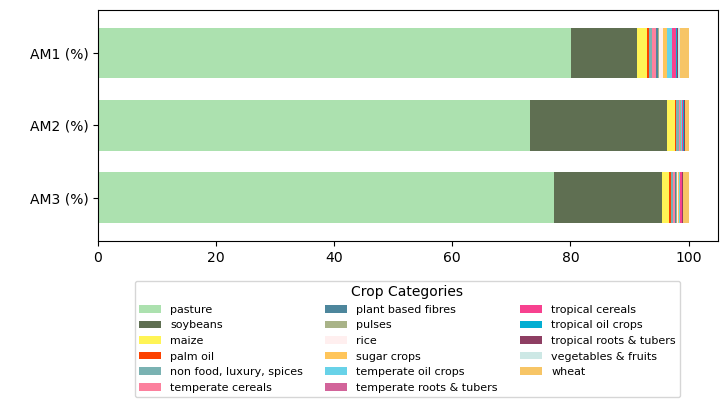

In [10]:
import numpy as np

label = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat','pasture']

colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
          '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
          '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566', '#ACE1AF']

# reorder the columns
new_order = ['pasture', 'soybeans'] + [col for col in df_south_am.columns if col not in ['pasture', 'soybeans']]
df_south_am = df_south_am[new_order]

df_south_am = df_south_am.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

new_colors = [colors[label.index(col)] for col in new_order]

# plot
fig, ax = plt.subplots(figsize=(8, 3))  # reduce the height of the figure
df_south_am.plot(kind = 'barh', stacked=True, color=new_colors, ax=ax, width=0.7)

# adjust the yticks
plt.yticks(np.arange(len(df_south_am.index)), df_south_am.index, ha='right')
plt.yticks(fontsize=10)

# plt.axvline(x=0, color='k', linewidth=1)
plt.legend(title='Crop Categories', loc='lower left', bbox_to_anchor = (0.05, -0.7), ncol=3, prop={'size': 8})

plt.show()

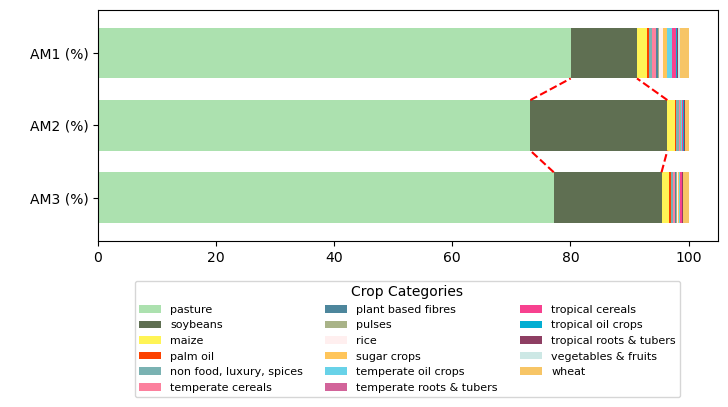

In [11]:
import numpy as np
import matplotlib.pyplot as plt

label = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat','pasture']

colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
          '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
          '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566', '#ACE1AF']

# reorder the columns
new_order = ['pasture', 'soybeans'] + [col for col in df_south_am.columns if col not in ['pasture', 'soybeans']]
df_south_am = df_south_am[new_order]

df_south_am = df_south_am.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

new_colors = [colors[label.index(col)] for col in new_order]

# plot
fig, ax = plt.subplots(figsize=(8, 3))  # reduce the height of the figure
df_south_am.plot(kind = 'barh', stacked=True, color=new_colors, ax=ax, width=0.7)

# adjust the yticks
plt.yticks(np.arange(len(df_south_am.index)), df_south_am.index, ha='right')
plt.yticks(fontsize=10)

# plt.axvline(x=0, color='k', linewidth=1)
plt.legend(title='Crop Categories', loc='lower left', bbox_to_anchor = (0.05, -0.7), ncol=3, prop={'size': 8})

# Calculate height dan number of stacks
height = ax.patches[0].get_height()
stacks = 2

# Plot connecting lines
for i in range(stacks):
    for j in range(len(df_south_am.index) - 1):
        w0 = sum(ax.patches[j + len(df_south_am.index) * k].get_width() for k in range(i + 1))
        w1 = sum(ax.patches[j + 1 + len(df_south_am.index) * k].get_width() for k in range(i + 1))
        
        ax.plot([w0, w1], [j + height / 2, j + 1 - height / 2], color='red', ls='--', zorder=1)

plt.show()

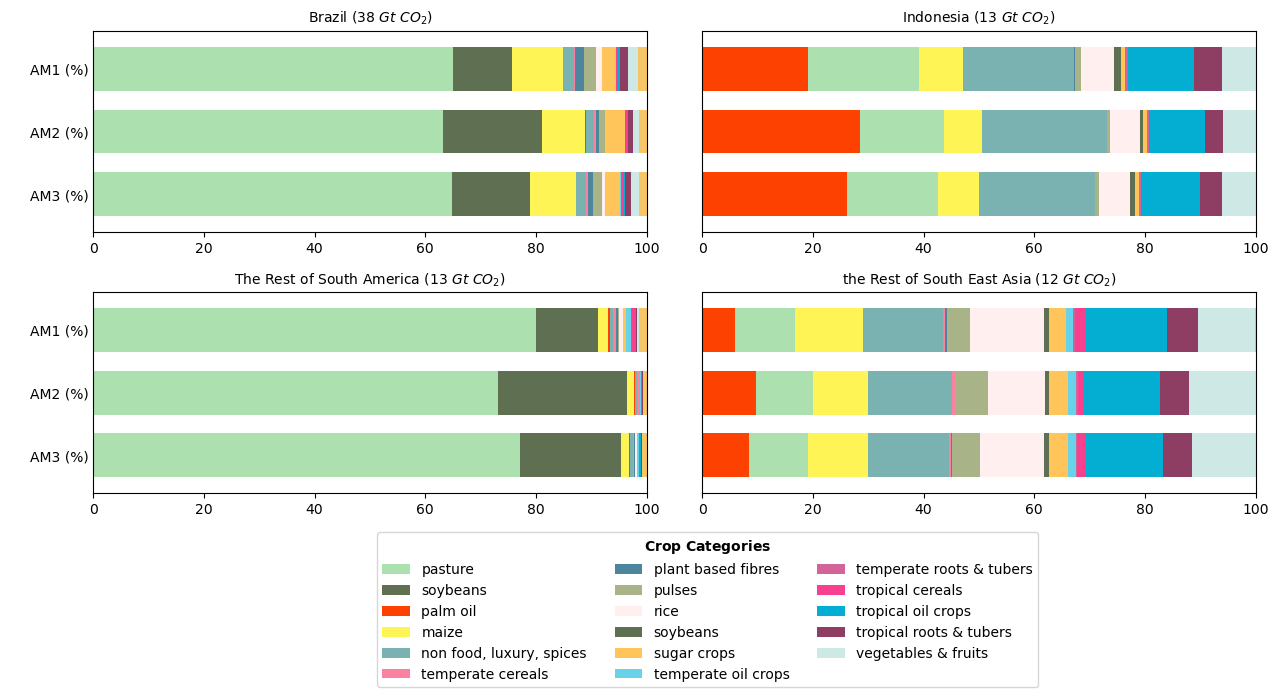

In [12]:
import matplotlib.pyplot as plt
import numpy as np


label = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat','pasture']

colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
          '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
          '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566', '#ACE1AF']

# create a figure with 2x2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# reorder the columns (FOR BRAZIL AND SOUTH AMERICA)
order_pasture_soybeans = ['pasture', 'soybeans'] + [col for col in df_south_am.columns if col not in ['pasture', 'soybeans']]

df_brazil = df_brazil[order_pasture_soybeans]
df_brazil = df_brazil.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

df_south_am = df_south_am[order_pasture_soybeans]
df_south_am = df_south_am.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

colors_pasture_soybeans = [colors[label.index(col)] for col in order_pasture_soybeans]

#Brazil (top left)
df_brazil.plot(kind='barh', stacked=True, color=new_colors, ax=axs[0, 0], width=0.7, legend=False)
axs[0, 0].set_title('Brazil (38 $Gt~CO_2$)', fontsize=10)
axs[0, 0].set_yticks(np.arange(len(df_brazil.index)))
axs[0, 0].tick_params(axis='y', length=0)
axs[0, 0].set_yticklabels(df_brazil.index, ha='right')
axs[0, 0].tick_params(axis='y', labelsize=10)

#South America (bottom left)
df_south_am.plot(kind='barh', stacked=True, color=new_colors, ax=axs[1, 0], width=0.7, legend=False)
axs[1, 0].set_title('The Rest of South America (13 $Gt~CO_2$)', fontsize=10)
axs[1, 0].set_yticks(np.arange(len(df_south_am.index)))
axs[1, 0].tick_params(axis='y', length=0)
axs[1, 0].set_yticklabels(df_south_am.index, ha='right')
axs[1, 0].tick_params(axis='y', labelsize=10)

# reorder the columns (FOR INDONESIA AND SEA)
order_palm_oil = ['palm oil'] + [col for col in df_indo.columns if col not in ['palm oil']]

df_indo = df_indo[order_palm_oil]
df_indo = df_indo.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

df_sea = df_sea[order_palm_oil]
df_sea = df_sea.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

colors_palmoil = [colors[label.index(col)] for col in order_palm_oil]

#Indonesia (top right)
df_indo.plot(kind='barh', stacked=True, color=colors_palmoil, ax=axs[0, 1], width=0.7, legend=False)
axs[0, 1].set_title('Indonesia (13 $Gt~CO_2$)', fontsize=10)
axs[0, 1].set_yticks(np.arange(len(df_indo.index)))
axs[0, 1].set_yticks([])
axs[0, 1].set_yticklabels([])  # remove y-axis labels
axs[0, 1].tick_params(axis='y', labelsize=10)

#SEA (bottom right)
df_sea.plot(kind='barh', stacked=True, color=colors_palmoil, ax=axs[1, 1], width=0.7, legend=False)
axs[1, 1].set_title('the Rest of South East Asia (12 $Gt~CO_2$)', fontsize=10)
axs[1, 1].set_yticks(np.arange(len(df_sea.index)))
axs[1, 1].set_yticks([])
axs[1, 1].set_yticklabels([])  # remove y-axis labels
axs[1, 1].tick_params(axis='y', labelsize=10)

# plt.tight_layout()

plt.subplots_adjust(wspace=0.1, hspace=0.3)  # set distance between subplots
for ax in axs.flat:
    ax.set_xmargin(0)
    ax.set_ymargin(0)

order = [1,8,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
handles, labels = ax.get_legend_handles_labels()

import matplotlib.font_manager as fm

font = fm.FontProperties(weight='bold', size=10)

plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order],title=r"$\bf{Crop\ Categories}$",
loc='lower left', bbox_to_anchor = (-0.6, -1), ncol=3, prop={'size': 10})
plt.show()

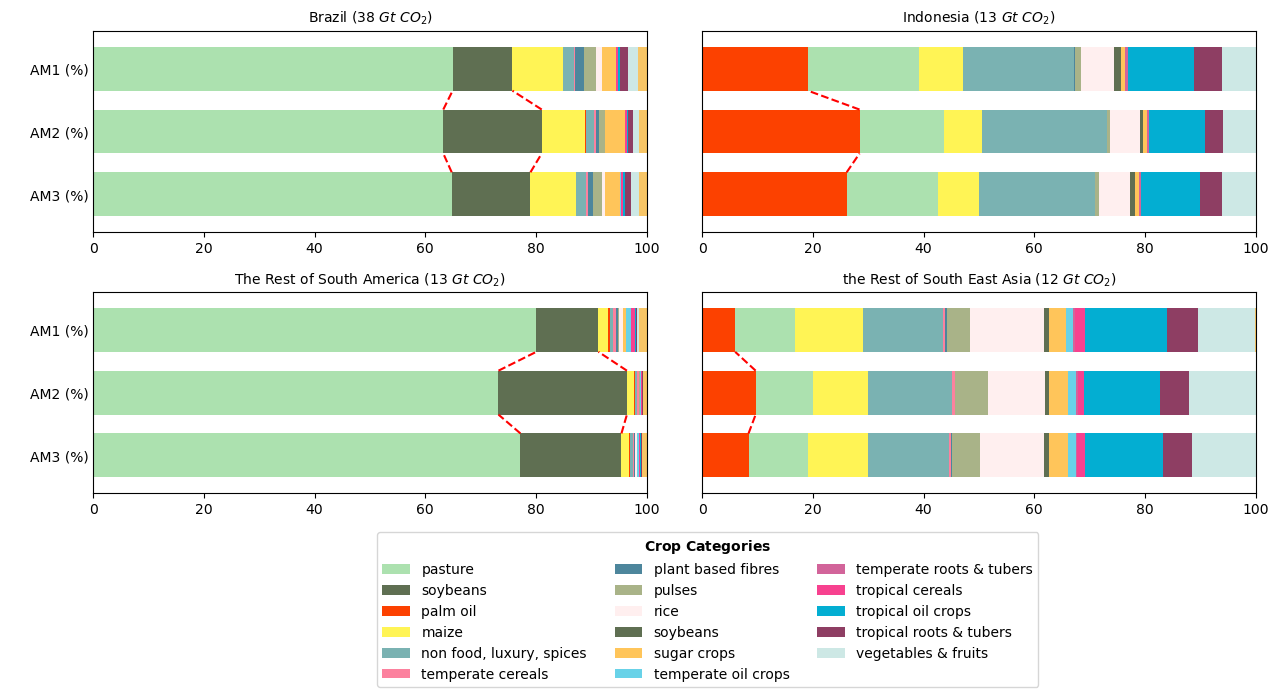

In [13]:
import matplotlib.pyplot as plt
import numpy as np

label = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat','pasture']

colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
          '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
          '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566', '#ACE1AF']

# create a figure with 2x2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# reorder the columns (FOR BRAZIL AND SOUTH AMERICA)
order_pasture_soybeans = ['pasture', 'soybeans'] + [col for col in df_south_am.columns if col not in ['pasture', 'soybeans']]

df_brazil = df_brazil[order_pasture_soybeans]
df_brazil = df_brazil.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

df_south_am = df_south_am[order_pasture_soybeans]
df_south_am = df_south_am.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

colors_pasture_soybeans = [colors[label.index(col)] for col in order_pasture_soybeans]

#Brazil (top left)
df_brazil.plot(kind='barh', stacked=True, color=colors_pasture_soybeans, ax=axs[0, 0], width=0.7, legend=False)
axs[0, 0].set_title('Brazil (38 $Gt~CO_2$)', fontsize=10)
axs[0, 0].set_yticks(np.arange(len(df_brazil.index)))
axs[0, 0].tick_params(axis='y', length=0)
axs[0, 0].set_yticklabels(df_brazil.index, ha='right')
axs[0, 0].tick_params(axis='y', labelsize=10)

# Plot connecting lines for Brazil
height = axs[0, 0].patches[0].get_height()
stacks = 2
for i in range(stacks):
    for j in range(len(df_brazil.index) - 1):
        w0 = sum(axs[0, 0].patches[j + len(df_brazil.index) * k].get_width() for k in range(i + 1))
        w1 = sum(axs[0, 0].patches[j + 1 + len(df_brazil.index) * k].get_width() for k in range(i + 1))
        
        axs[0, 0].plot([w0, w1], [j + height / 2, j + 1 - height / 2], color='red', ls='--', zorder=1)

#South America (bottom left)
df_south_am.plot(kind='barh', stacked=True, color=colors_pasture_soybeans, ax=axs[1, 0], width=0.7, legend=False)
axs[1, 0].set_title('The Rest of South America (13 $Gt~CO_2$)', fontsize=10)
axs[1, 0].set_yticks(np.arange(len(df_south_am.index)))
axs[1, 0].tick_params(axis='y', length=0)
axs[1, 0].set_yticklabels(df_south_am.index, ha='right')
axs[1, 0].tick_params(axis='y', labelsize=10)

# Plot connecting lines for South America
height = axs[1, 0].patches[0].get_height()
stacks = 2
for i in range(stacks):
    for j in range(len(df_south_am.index) - 1):
        w0 = sum(axs[1, 0].patches[j + len(df_south_am.index) * k].get_width() for k in range(i + 1))
        w1 = sum(axs[1, 0].patches[j + 1 + len(df_south_am.index) * k].get_width() for k in range(i + 1))
        
        axs[1, 0].plot([w0, w1], [j + height / 2, j + 1 - height / 2], color='red', ls='--', zorder=1)

# reorder the columns (FOR INDONESIA AND SEA)
order_palm_oil = ['palm oil'] + [col for col in df_indo.columns if col not in ['palm oil']]

df_indo = df_indo[order_palm_oil]
df_indo = df_indo.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

df_sea = df_sea[order_palm_oil]
df_sea = df_sea.loc[['AM3 (%)', 'AM2 (%)', 'AM1 (%)']]

colors_palmoil = [colors[label.index(col)] for col in order_palm_oil]

#Indonesia (top right)
df_indo.plot(kind='barh', stacked=True, color=colors_palmoil, ax=axs[0, 1], width=0.7, legend=False)
axs[0, 1].set_title('Indonesia (13 $Gt~CO_2$)', fontsize=10)
axs[0, 1].set_yticks(np.arange(len(df_indo.index)))
axs[0, 1].set_yticks([])
axs[0, 1].set_yticklabels([])  # remove y-axis labels
axs[0, 1].tick_params(axis='y', labelsize=10)

height = axs[0, 1].patches[0].get_height()
stacks = 1
for i in range(stacks):
    for j in range(len(df_indo.index) - 1):
        w0 = sum(axs[0, 1].patches[j + len(df_indo.index) * k].get_width() for k in range(i + 1))
        w1 = sum(axs[0, 1].patches[j + 1 + len(df_indo.index) * k].get_width() for k in range(i + 1))
        
        axs[0, 1].plot([w0, w1], [j + height / 2, j + 1 - height / 2], color='red', ls='--', zorder=1)

#SEA (bottom right)
df_sea.plot(kind='barh', stacked=True, color=colors_palmoil, ax=axs[1, 1], width=0.7, legend=False)
axs[1, 1].set_title('the Rest of South East Asia (12 $Gt~CO_2$)', fontsize=10)
axs[1, 1].set_yticks(np.arange(len(df_sea.index)))
axs[1, 1].set_yticks([])
axs[1, 1].set_yticklabels([])  # remove y-axis labels
axs[1, 1].tick_params(axis='y', labelsize=10)

height = axs[1, 1].patches[0].get_height()
stacks = 1
for i in range(stacks):
    for j in range(len(df_sea.index) - 1):
        w0 = sum(axs[1, 1].patches[j + len(df_sea.index) * k].get_width() for k in range(i + 1))
        w1 = sum(axs[1, 1].patches[j + 1 + len(df_sea.index) * k].get_width() for k in range(i + 1))
        
        axs[1, 1].plot([w0, w1], [j + height / 2, j + 1 - height / 2], color='red', ls='--', zorder=1)

# plt.tight_layout()

plt.subplots_adjust(wspace=0.1, hspace=0.3)  # set distance between subplots
for ax in axs.flat:
    ax.set_xmargin(0)
    ax.set_ymargin(0)

order = [1,8,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
handles, labels = ax.get_legend_handles_labels()

import matplotlib.font_manager as fm

font = fm.FontProperties(weight='bold', size=10)

plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order],title=r"$\bf{Crop\ Categories}$",
loc='lower left', bbox_to_anchor = (-0.6, -1), ncol=3, prop={'size': 10})
plt.show()